In [168]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn

In [5]:
df=pd.read_csv('hour.csv')

In [26]:
bike=df.copy()

In [27]:
bike

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [28]:
bike_n=bike.drop(['index','date','casual','registered'],axis=1)

In [29]:
bike_n.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [30]:
print(type(bike_n))
print(bike_n)

<class 'pandas.core.frame.DataFrame'>
       season  year  month  hour  holiday  weekday  workingday  weather  temp  \
0           1     0      1     0        0        6           0        1  0.24   
1           1     0      1     1        0        6           0        1  0.22   
2           1     0      1     2        0        6           0        1  0.22   
3           1     0      1     3        0        6           0        1  0.24   
4           1     0      1     4        0        6           0        1  0.24   
...       ...   ...    ...   ...      ...      ...         ...      ...   ...   
17374       1     1     12    19        0        1           1        2  0.26   
17375       1     1     12    20        0        1           1        2  0.26   
17376       1     1     12    21        0        1           1        1  0.26   
17377       1     1     12    22        0        1           1        1  0.26   
17378       1     1     12    23        0        1           1        1

In [22]:
bikes

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [31]:
bike_n.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

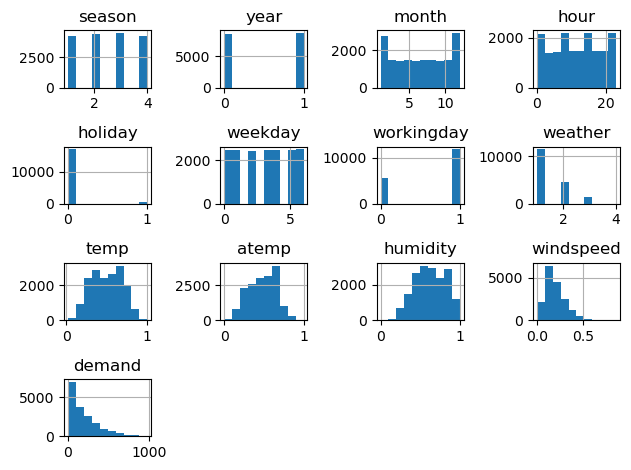

In [38]:
bike_n.hist(rwidth=1)
plt.tight_layout()

## predicted variable demand is not linearly distributed
# Data visualization
  #Visualize continuous features vs Demand

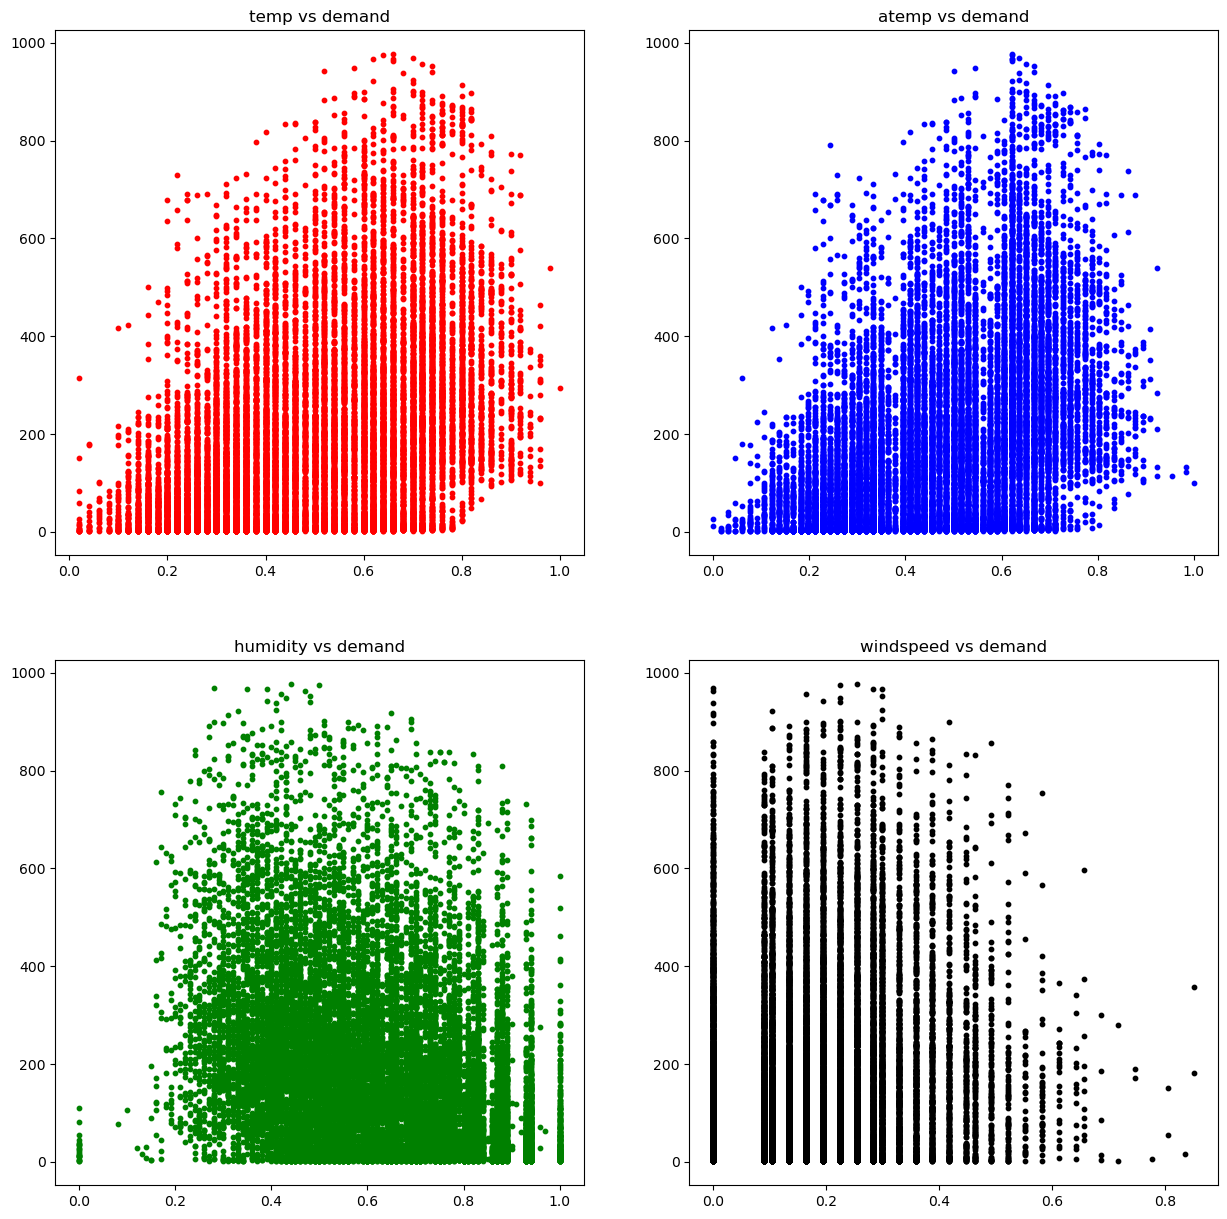

In [95]:
%matplotlib inline 
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.scatter(bike_n['temp'],bike_n['demand'],c='r',s=10)
plt.title("temp vs demand")

plt.subplot(2,2,2)
plt.scatter(bike_n['atemp'],bike_n['demand'],c='b',s=10)
plt.title("atemp vs demand")

plt.subplot(2,2,3)
plt.scatter(bike_n['humidity'],bike_n['demand'],c='g',s=10)
plt.title("humidity vs demand")

plt.subplot(2,2,4)
plt.scatter(bike_n['windspeed'],bike_n['demand'],c='black',s=10)
plt.title("windspeed vs demand")
plt.show()

In [49]:
# plot the categoricl features vs demand


In [54]:
cat_list=bike_n['season'].unique()

In [65]:
cat_avg=bike_n.groupby('season').mean()['demand']

In [61]:
cat_avg

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: demand, dtype: float64

<BarContainer object of 4 artists>

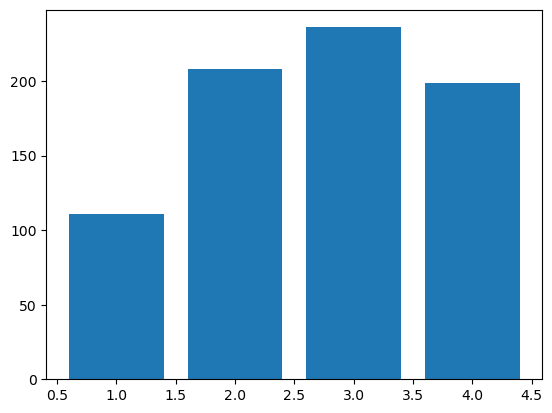

In [66]:
plt.bar(cat_list,cat_avg)

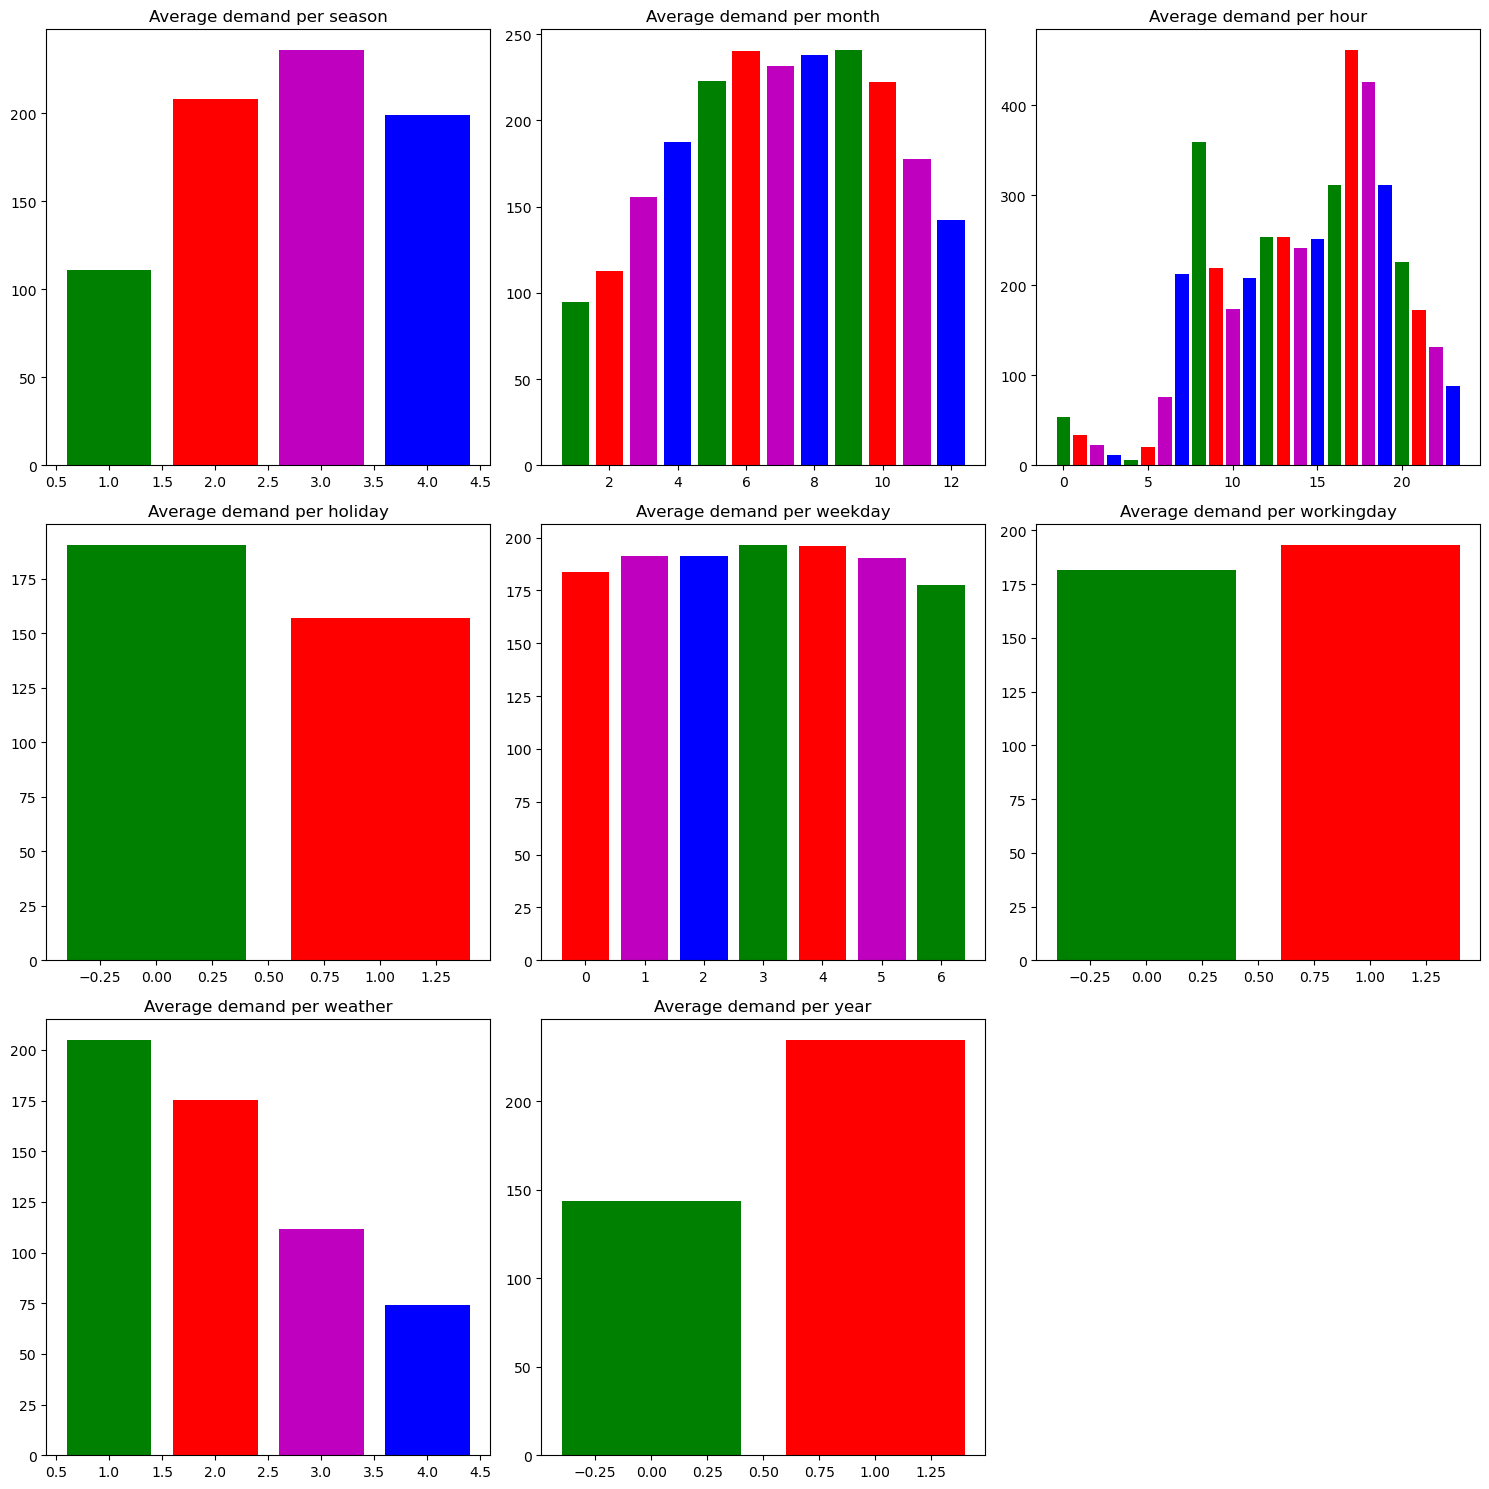

In [96]:

%matplotlib inline 

plt.figure(figsize=(15,15))
colors=['g','r','m','b']
plt.tight_layout()
plt.subplot(3,3,1)
cat_list=bike_n['season'].unique()
cat_avg=bike_n.groupby('season').mean()['demand']
plt.bar(cat_list,cat_avg,color=colors)
plt.title("Average demand per season")

plt.subplot(3,3,2)
cat_list=bike_n['month'].unique()
cat_avg=bike_n.groupby('month').mean()['demand']
plt.bar(cat_list,cat_avg,color=colors)
plt.title("Average demand per month")

plt.subplot(3,3,3)
cat_list=bike_n['hour'].unique()
cat_avg=bike_n.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_avg,color=colors)
plt.title("Average demand per hour")

plt.subplot(3,3,4)
cat_list=bike_n['holiday'].unique()
cat_avg=bike_n.groupby('holiday').mean()['demand']
plt.bar(cat_list,cat_avg,color=colors)
plt.title("Average demand per holiday")

plt.subplot(3,3,4)
cat_list=bike_n['holiday'].unique()
cat_avg=bike_n.groupby('holiday').mean()['demand']
plt.bar(cat_list,cat_avg,color=colors)
plt.title("Average demand per holiday")

plt.subplot(3,3,5)
cat_list=bike_n['weekday'].unique()
cat_avg=bike_n.groupby('weekday').mean()['demand']
plt.bar(cat_list,cat_avg,color=colors)
plt.title("Average demand per weekday")

plt.subplot(3,3,6)
cat_list=bike_n['workingday'].unique()
cat_avg=bike_n.groupby('workingday').mean()['demand']
plt.bar(cat_list,cat_avg,color=colors)
plt.title("Average demand per workingday")

plt.subplot(3,3,7)
cat_list=bike_n['weather'].unique()
cat_avg=bike_n.groupby('weather').mean()['demand']
plt.bar(cat_list,cat_avg,color=colors)
plt.title("Average demand per weather")


plt.subplot(3,3,8)
cat_list=bike_n['year'].unique()
cat_avg=bike_n.groupby('year').mean()['demand']
plt.bar(cat_list,cat_avg,color=colors)
plt.title("Average demand per year")
plt.tight_layout()
plt.show()



In [98]:
# Check for outliers

bike_n['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [99]:
bike_n['demand'].quantile([0.05,0.1,0.15,0.9,0.90,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.90    451.20
0.99    782.22
Name: demand, dtype: float64

In [107]:
correlation=bike_n[['temp','atemp','humidity','windspeed','demand']].corr()
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [ ]:
## from observations we can drop above variable features

##from observing correlation coeff matrix
    1- atemp
    2- windspeed




   3- weekday
   4- year
   5- workingday

In [117]:
bikesp=bike_n.drop(['atemp','windspeed','weekday','year','workingday'],axis=1)
bikesp

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,119
17375,1,12,20,0,2,0.26,0.60,89
17376,1,12,21,0,1,0.26,0.60,90
17377,1,12,22,0,1,0.26,0.56,61


In [118]:
# check the autocorrelation for demand
print(bikesp['demand'].dtype)

int64


In [119]:
df2=pd.to_numeric(bikesp['demand'],downcast='float')

In [120]:
print(bikesp['demand'].dtype)

int64


In [121]:
df2

0         16.0
1         40.0
2         32.0
3         13.0
4          1.0
         ...  
17374    119.0
17375     89.0
17376     90.0
17377     61.0
17378     49.0
Name: demand, Length: 17379, dtype: float32

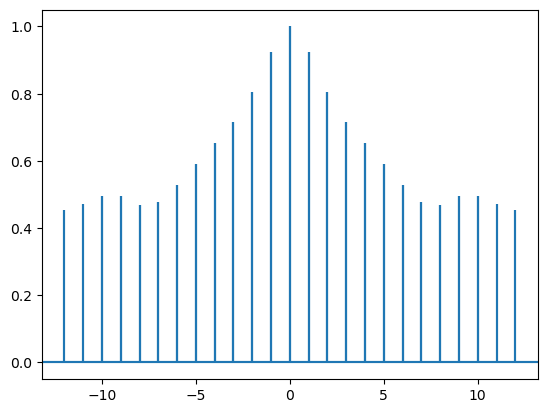

In [124]:
plt.acorr(df2,maxlags=12)
plt.show()

In [125]:
# There is high autocorrelation in demand using accor

In [126]:
# Demand is not normally distributed
# log normal distribution can check

In [127]:
# log normalise the demand feature

In [128]:
dfd=bikesp['demand']
dfn=np.log(dfd)

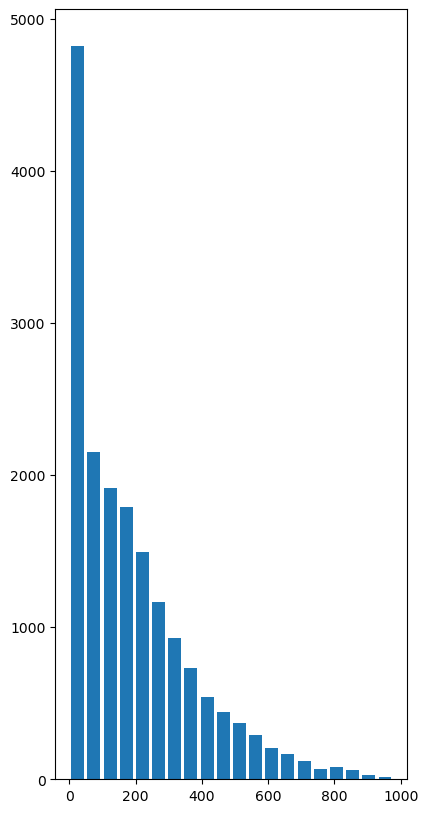

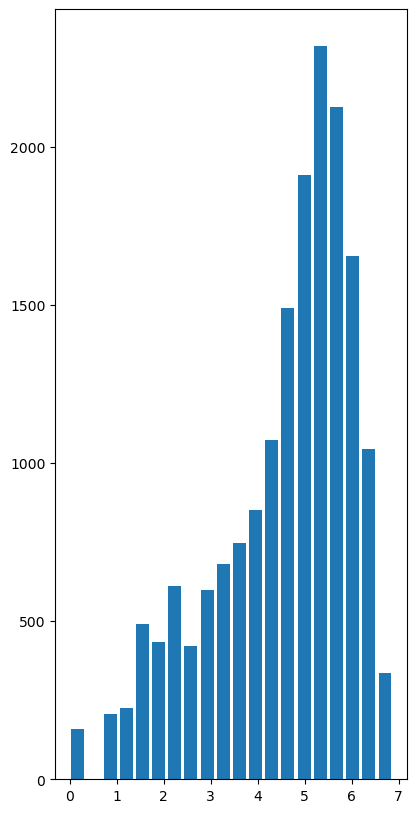

In [149]:
plt.close()
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.hist(dfd,rwidth=0.8,bins=20)
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(1,2,2)
plt.hist(dfn,rwidth=0.8,bins=20)
plt.show()

In [151]:
bikesp['demand']=np.log(bikesp['demand'])

In [152]:
bikesp

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,2.772589
1,1,1,1,0,1,0.22,0.80,3.688879
2,1,1,2,0,1,0.22,0.80,3.465736
3,1,1,3,0,1,0.24,0.75,2.564949
4,1,1,4,0,1,0.24,0.75,0.000000
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123
17375,1,12,20,0,2,0.26,0.60,4.488636
17376,1,12,21,0,1,0.26,0.60,4.499810
17377,1,12,22,0,1,0.26,0.56,4.110874


In [165]:

# Solve the problem of Autocorrelation
# Shift the demand by 3 lags

t_1 = bikesp['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikesp['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikesp['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikesp_lag = pd.concat([bikesp, t_1, t_2, t_3], axis=1)

bikesp_lag = bikesp_lag.dropna()
bikesp_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [166]:

# -----------------------------------------------------------------------------
# Step 7 - Create Dummy Variables and drop first to avoid dummy variables trap
# -----------------------------------------------------------------------------
# - season
# - holiday
# - weather
# - month
# - hour
#
# Using get_dummies


In [160]:
#df_dummy=pd.get_dummies(bikesp_lag,drop_first=True)

In [167]:

bikesp_lag['season'] = bikesp_lag['season'].astype('category')
bikesp_lag['holiday'] = bikesp_lag['holiday'].astype('category')
bikesp_lag['weather'] = bikesp_lag['weather'].astype('category')
bikesp_lag['month'] = bikesp_lag['month'].astype('category')
bikesp_lag['hour'] = bikesp_lag['hour'].astype('category')

bikesp_lag = pd.get_dummies(bikesp_lag, drop_first=True)
bikesp_lag

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [184]:
# train and test splitting 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=bikesp_lag.drop(['demand'],axis=1)
Y=bikesp_lag['demand']


tr_size = 0.7 * len(X)
tr_size = int(tr_size)

X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]

regmodel=LinearRegression()
regmodel.fit(X_train,Y_train)


regmodel.score(X_test,Y_test)


y_preds=regmodel.predict(X_test)

rmse=math.sqrt(mean_squared_error(Y_test,y_preds))

rmse

0.38098800498170254

In [192]:
# calculate RMSLE and compare results
# Exponent- it is opposite to log

Y_test_e = []
y_preds_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    y_preds_e.append(math.exp(y_preds[i]))

log_sq_sum = 0.0

for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(y_preds_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))

print(rmsle)

0.35609417069801885
